<a href="https://colab.research.google.com/github/MAICHIVINH/BachHoaXanh/blob/master/03_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Session #3: Edge Detection**


by Sihyeon Kim (mlv lab @ Korea University) on October 2019

for SKC Lecture, Fall 2019 (Prof. Hyunwoo J. Kim)


---
**Contents**
1. Sobel Edge Detection
2. Laplacian Edge Detection
3. Canny Edge Detection


**Reference**



*   [Edge Detection](https://opencv-python.readthedocs.io/en/latest/doc/13.imageGradient/imageGradient.html)

---




**0. Preparation**


*   For your convenience, it is recommended to mount your Google Drive first.
*   Then create extra space for this tutorial in there.


---






In [1]:
from google.colab import drive
root = '/content/drive/'
drive.mount(root)

Mounted at /content/drive/


In [2]:
# Making Directory

import os
from os.path import join

labsession01 = "My Drive/Colab Notebooks/SKC/"   # a custom path. you can change if you want to
labsession01_PATH = join(root,labsession01)
#!mkdir "{labsession01_PATH}"



---


# **1. Sobel Edge Detectionn**

What is Sobel edge detector?

*  an edge detecting method based on the gradients
*   It calculates the first derivatives of the image separately for the X (horizontal changes) and Y (vertical changes) axes



In [3]:
#!cd "{labsession01_PATH}";wget http://aishack.in/static/img/tut/sudoku-original.jpg;
!cd "{labsession01_PATH}";ls

/bin/bash: line 1: cd: /content/drive/My Drive/Colab Notebooks/SKC/: No such file or directory
drive  sample_data


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

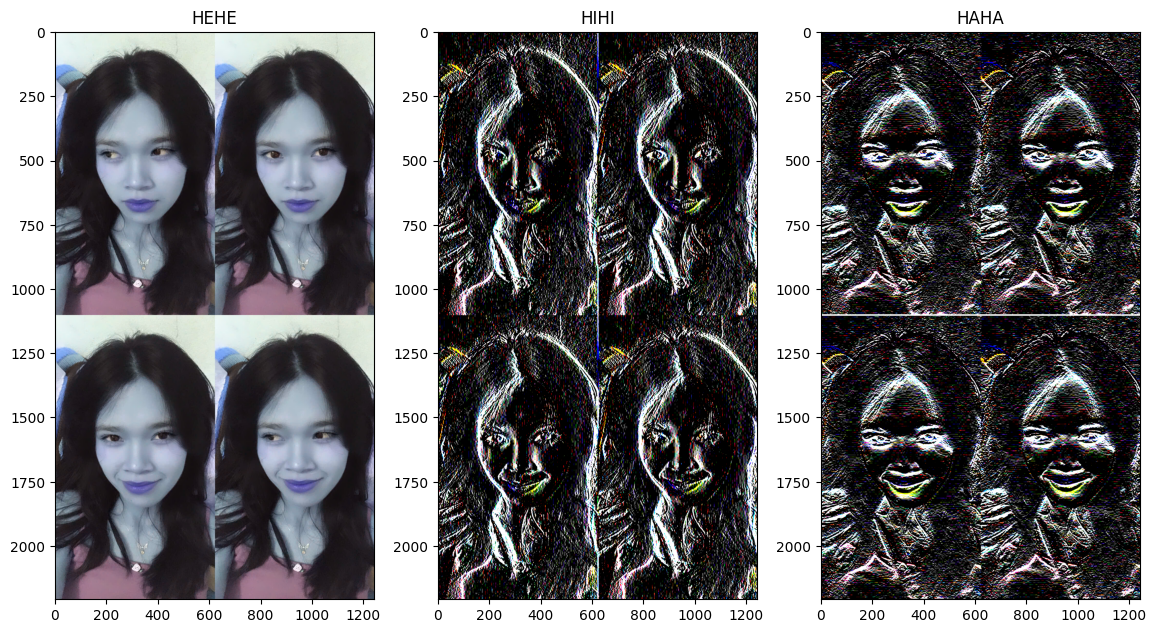

In [5]:
# sobel filters with cv2.Sobel
img0 = cv2.imread('/content/z6231861179233_0711c9b2555092a4e28324a218b1df29.jpg')
# remove noise
img = cv2.GaussianBlur(img0,(3,3),0)

sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 14))
image_list = [img0,sobelx, sobely]
title_list = ["HEHE","HIHI", "HAHA"]
for i in range(0, 3):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

# **2. Laplacian Edge Detection**

What is Sobel edge detector?

*  an edge detecting method based on the second derivatives


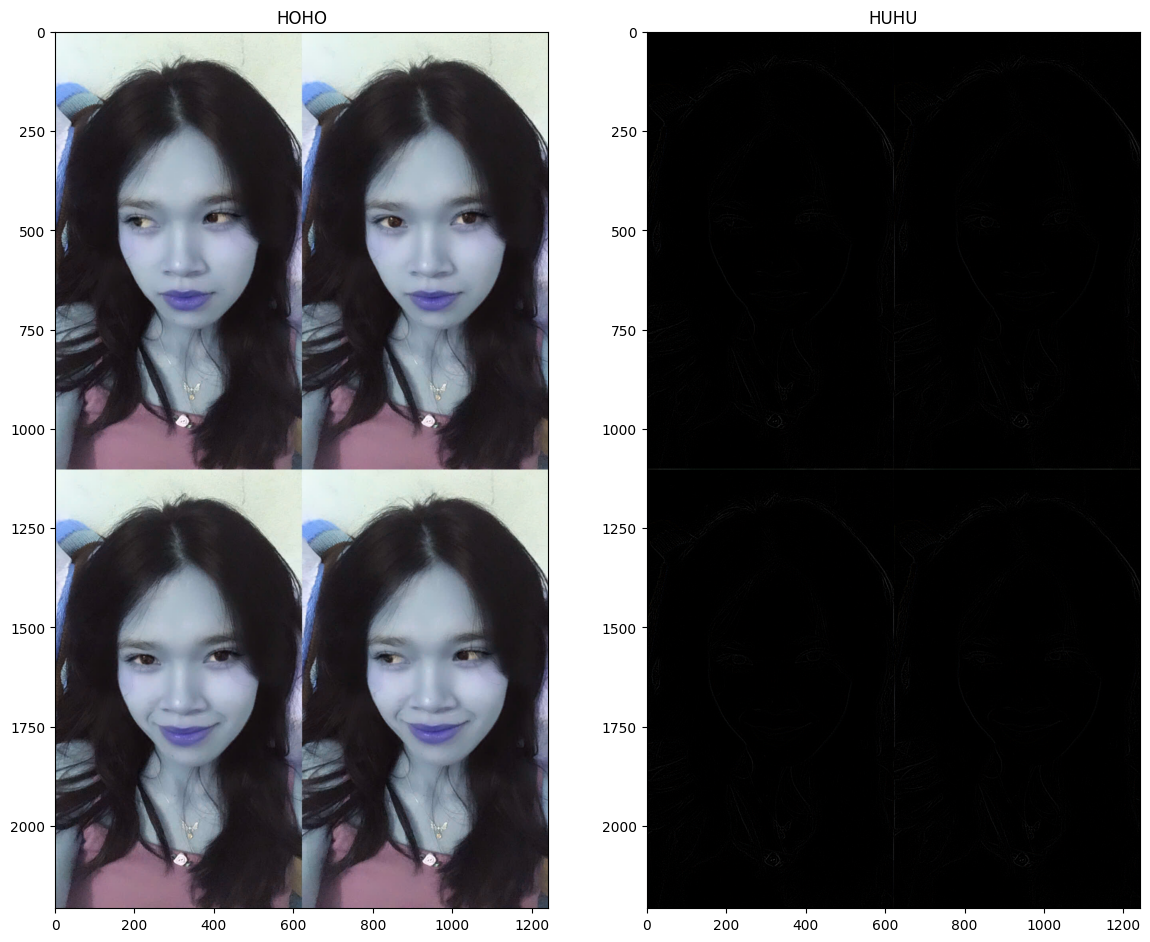

In [6]:
# using sudoku picture above
laplacian = cv2.Laplacian(img,cv2.CV_8U)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 14))
image_list = [img0,laplacian]
title_list = ["HOHO","HUHU"]
for i in range(0, 2):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()

**Assignment**: Building a edge detector from scratch

In [10]:
# Using Lena!
img_lena = cv2.imread('/content/z6231861179233_0711c9b2555092a4e28324a218b1df29.jpg')
width,height,_ = img_lena.shape

# Convert into gray img
gray = cv2.cvtColor(img_lena, cv2.COLOR_BGR2GRAY)

gray_filtered = np.zeros((width,height))    # initializtion

Let's take a look at filters we used above

In [14]:
# Sobel Separable Filter in x direction
sobelx1 = np.array([[1,2,1]], dtype = float).T  #column
sobelx2 = np.array([[-1,0,1]], dtype = float) #row
sobelx = np.multiply(sobelx1,sobelx2)

# Sobel Separable Filter in y direction
sobely1 = np.array([[-1,0,1]], dtype = float).T #column
sobely2 = np.array([[1,2,1]], dtype = float)  #row
sobely = np.multiply(sobely1,sobely2)

# Laplacian Filter
lap = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype = float)

print(sobelx);print(sobely);print(lap);

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


Pick one filter you want and let's apply it!

Fill in ?? part below


In [16]:
for x in range(1, width-1):  # ignore the edge pixels for simplicity (1 to width-1)
    for y in range(1, height-1): # ignore edge pixels for simplicity (1 to height-1)
      for i in range(???):
        for j in range(???):
          gray_filtered[x][y] += ???[i][j]*gray[???][???]


SyntaxError: invalid syntax (<ipython-input-16-1153ed84083d>, line 3)

In [ ]:
plt.imshow(gray_filtered,cmap=plt.cm.gray)
plt.show()

# **3. Canny Edge Detection**



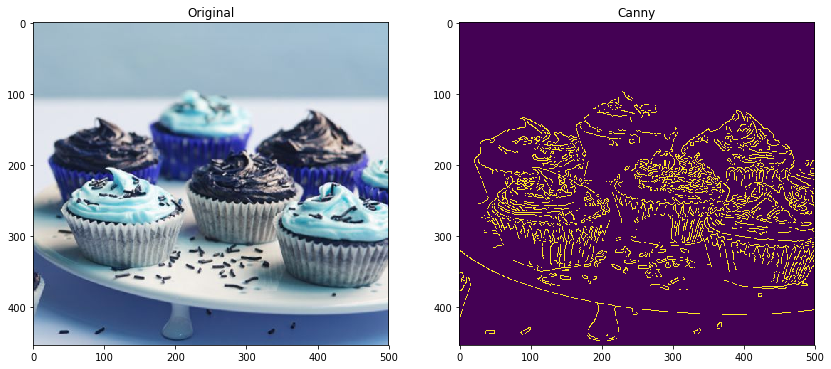

In [ ]:
img_cc = cv2.imread('/content/drive/My Drive/Colab Notebooks/SKC/amazing_choc_cupcakes.jpg?itok=aeKOFRRI')

canny = cv2.Canny(img_cc,100,200)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 14))
image_list = [img_cc,canny]
title_list = ["Original","Canny"]
for i in range(0, 2):
    ax = axs[i]
    ax.imshow(image_list[i])
    ax.title.set_text(title_list[i])
plt.show()